# Plot of $N_{\mathrm{lines}}$ as a function of $T_{\mathrm{eff}}$ and instrument


Figure 1 in the paper.

The goal of this figure will be number of identified lines versus Teff, for two spectrograph bandwidths-- HPF and IGRINS.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import seaborn as sns
sns.set_context('paper', font_scale=2)

In [2]:
import pandas as pd

In [3]:
sns.set_context('paper', font_scale=1.5)

In [4]:
! ls -1 ../data/tables/performance/

HPF_N_lines_prom0p005.csv
HPF_N_lines_prom0p01.csv
HPF_N_lines_prom0p02.csv
IGRINS_N_lines_prom0p005.csv
IGRINS_N_lines_prom0p01.csv
IGRINS_N_lines_prom0p02.csv


In [5]:
fns = ['HPF_N_lines_prom0p005.csv','HPF_N_lines_prom0p01.csv','HPF_N_lines_prom0p02.csv',
       'IGRINS_N_lines_prom0p005.csv','IGRINS_N_lines_prom0p01.csv','IGRINS_N_lines_prom0p02.csv']

In [6]:
proms = [0.005, 0.01, 0.02, 0.005, 0.01, 0.02]

In [7]:
df = pd.DataFrame()
for fn, prom in zip(fns, proms):
        df_i = pd.read_csv('../data/tables/performance/'+fn)
        df_i['prom'] = prom
        df_i['inst'] = fn[0:3]
        df = df.append(df_i)

In [8]:
color_dict = {'HPF':'#d35400', 'IGR':'#2980b9'}
marker_dict = {0.005:'+', 0.01:'s', 0.02:'o'}
linestyle_dict = {'HPF':'none', 'IGR':'solid'}

In [9]:
instrument_name = {'HPF':'HPF', 'IGR':'IGRINS'}

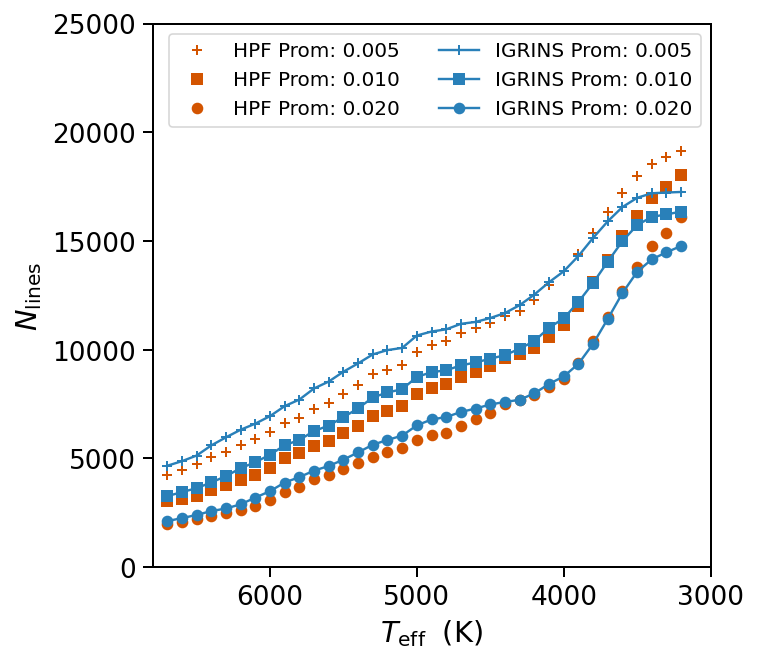

In [11]:
fig = plt.figure(figsize=(5, 5))

for (inst, prom), group in df.groupby(['inst', 'prom']):
    plt.plot(group.Teff, group.N_lines, marker_dict[prom], 
             color=color_dict[inst], 
             linestyle=linestyle_dict[inst],
             label="{} Prom: {:0.3f}".format(instrument_name[inst], prom))
    
plt.xlabel('$T_{\mathrm{eff}}\;$ (K)')
plt.xlim(6800, 3000)
plt.ylabel('$N_{\mathrm{lines}}$')
plt.ylim(0, 25_000)
plt.legend(fontsize=10, ncol=2);
plt.savefig('../paper/paper1/figures/N_lines_vs_Teff_prom.png', dpi=300, bbox_inches='tight')

In [17]:
df.groupby(['inst', 'prom']).N_lines.mean().to_frame()/6700

N_lines
inst prom           
HPF  0.005  1.562931
     0.010  1.291385
     0.020  1.007280
IGR  0.005  1.601053
     0.010  1.334731
     0.020  1.035821

In [15]:
1.3*1.2

1.56

Okay, good enough!